1.Выберите наборы данных. которые можно интерпретировать, как временные ряды:

а) зависимость цены на недвижимость в конкретном регионе от времени, да

б) скорость полета самолета при перелете из аэропорта А в аэропорт В, да

в) количество отказов компьютера, нет

г) число обращений в поликлинику по району, да

д) координаты автобуса при движении по маршруту, да 

е) координаты фигуры нарушителя в файле видеофиксации охранной системы. нет

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np 
import pandas as pd 
import seaborn as sns

from sklearn.metrics import mean_squared_error

2.Прочитайте DUQ_hourly.csv и проверьте качество и порядок разметки этой выборки с информацией о потреблении энергии в одном из районов Восточной Электросети США. Сделайте описание особенностей этой выборки.

In [3]:
data = pd.read_csv('DUQ_hourly.csv', index_col=[0], parse_dates=[0])

In [4]:
data.head()

,DUQ_MW
Datetime,
2005-12-31 01:00:00,1458.0
2005-12-31 02:00:00,1377.0
2005-12-31 03:00:00,1351.0
2005-12-31 04:00:00,1336.0
2005-12-31 05:00:00,1356.0


Text(0, 0.5, 'МВт')

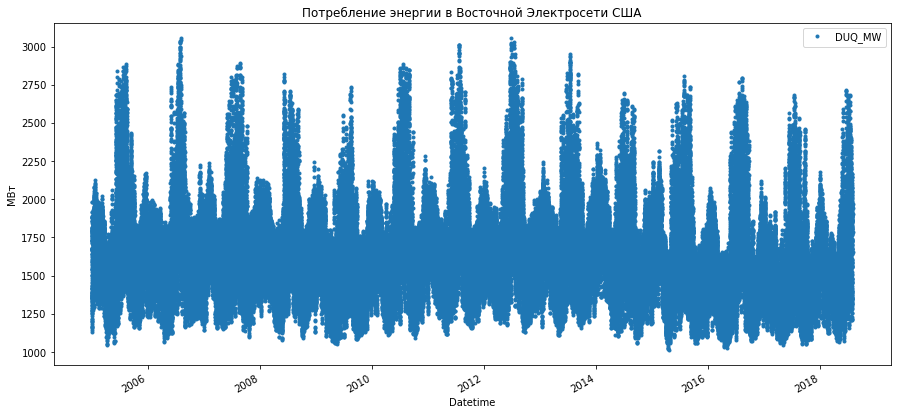

In [5]:
data.plot( style = '.', figsize = ( 15, 7 ), title = 'Потребление энергии в Восточной Электросети США' )
plt.ylabel ( 'МВт' )

In [6]:
data['date'] = data.index
data_2015 = data.loc[np.logical_and( np.logical_and( data['date'].dt.year == 2015 , data['date'].dt.month == 1), data['date'].dt.day < 10  )]

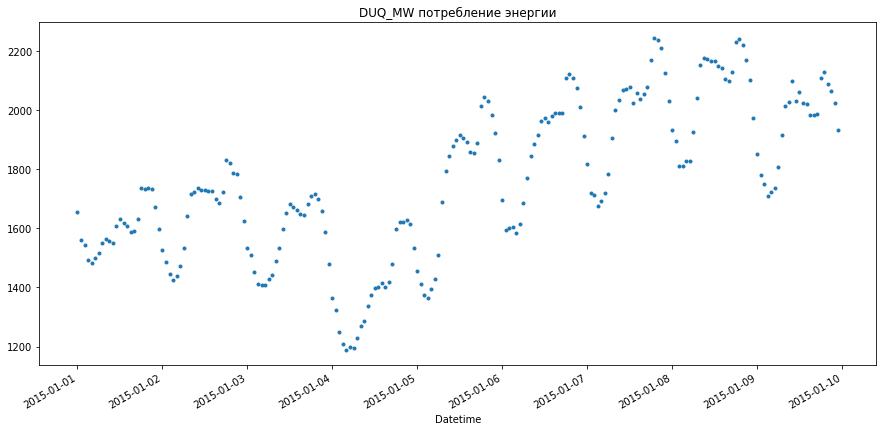

In [7]:
_ = data_2015['DUQ_MW'].plot( style='.', figsize=( 15, 7 ), title='DUQ_MW потребление энергии' )

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 119068 entries, 2005-12-31 01:00:00 to 2018-01-02 00:00:00
Data columns (total 2 columns):
DUQ_MW    119068 non-null float64
date      119068 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 2.7 MB


In [9]:
data['DUQ_MW'].isnull().sum()

0

In [10]:
data['date'] = data.index
data.head()

,DUQ_MW,date
Datetime,,
2005-12-31 01:00:00,1458.0,2005-12-31 01:00:00
2005-12-31 02:00:00,1377.0,2005-12-31 02:00:00
2005-12-31 03:00:00,1351.0,2005-12-31 03:00:00
2005-12-31 04:00:00,1336.0,2005-12-31 04:00:00
2005-12-31 05:00:00,1356.0,2005-12-31 05:00:00


In [11]:
ut = data['date'].unique()
print('число уникальных значений:   ',ut.shape[0],' : число наблюдений : ', data.shape[0])

число уникальных значений:    119064  : число наблюдений :  119068


In [12]:
count_data = data['date'].value_counts()
count_data.head()

2017-11-05 02:00:00    2
2014-11-02 02:00:00    2
2015-11-01 02:00:00    2
2016-11-06 02:00:00    2
2007-07-15 10:00:00    1
Name: date, dtype: int64

In [17]:
day_H=data['2005-12-31 01:00:00':'2018-01-02 00:00:00'].index.day

Day_count = day_H.value_counts() 
d = Day_count[Day_count != 24].unique()
d

array([3480, 3457, 3456, 3455, 3454, 3239, 3168, 2039], dtype=int64)

Сильных выбросов нет.  Есть задвоенные даные в 4 случаях и пропуски в 8 случаях

3.Прочитайте базу Brent и сделайте ее перерасчет (ресемплинг) в представление по неделям , по месяцам.

In [18]:
brent_data = pd.read_excel('brent 2010-2019.xlsx', index_col=[0], parse_dates=[0])
brent_data.head()

,Значение
Дата,
2019-09-01,58.84
2019-08-30,59.19
2019-08-29,60.37
2019-08-28,59.84
2019-08-27,59.59


In [19]:
brent_data_month = brent_data.resample("M").mean()
brent_data_month.head()

,Значение
Дата,
2010-09-30,78.228148
2010-10-31,83.473462
2010-11-30,86.178077
2010-12-31,92.232308
2011-01-31,97.033200


In [20]:
brent_data_week = brent_data.resample("W").mean()
brent_data_week.head()

,Значение
Дата,
2010-09-05,76.616000
2010-09-12,77.673333
2010-09-19,78.693333
2010-09-26,78.518333
2010-10-03,81.211667


4.Постройте график изменения среднего по выборке и среднего отклонения по выборке на недельных, месячных и годовых группах для Brent.

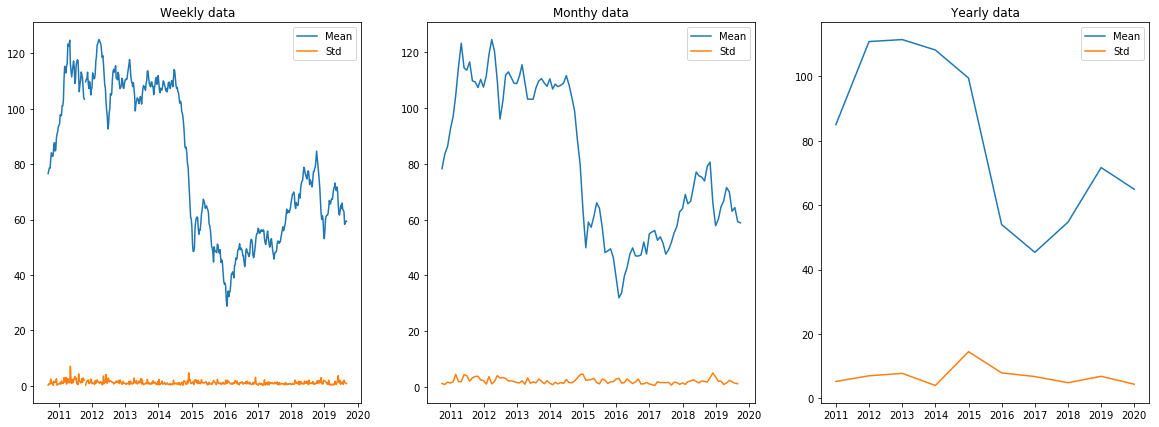

In [25]:
fig, ax = plt.subplots(nrows=1, ncols=3)
fig.set_size_inches (20 , 7)
ax[0].plot(brent_data.resample("W").mean(), label='Mean')
ax[0].plot(brent_data.resample("W").std(), label='Std')
ax[0].set_title('Weekly data')
ax[0].legend()

ax[1].plot(brent_data.resample("M").mean(), label='Mean')
ax[1].plot(brent_data.resample("M").std(), label='Std')
ax[1].set_title('Monthy data')
ax[1].legend()

ax[2].plot(brent_data.resample("Y").mean(), label='Mean')
ax[2].plot(brent_data.resample("Y").std(), label='Std')
ax[2].set_title('Yearly data')
ax[2].legend()

5.Сделайте вывод о том, как изменилось поведение цены на недельных и месячных графиках по сравнению с дневными.

Чем больше период тем меньше амплитуда, и тем виднее тренд в целом